In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [5]:
data.shape

(962, 2)

In [6]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
data['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [8]:
category = data['Category'].value_counts().reset_index()

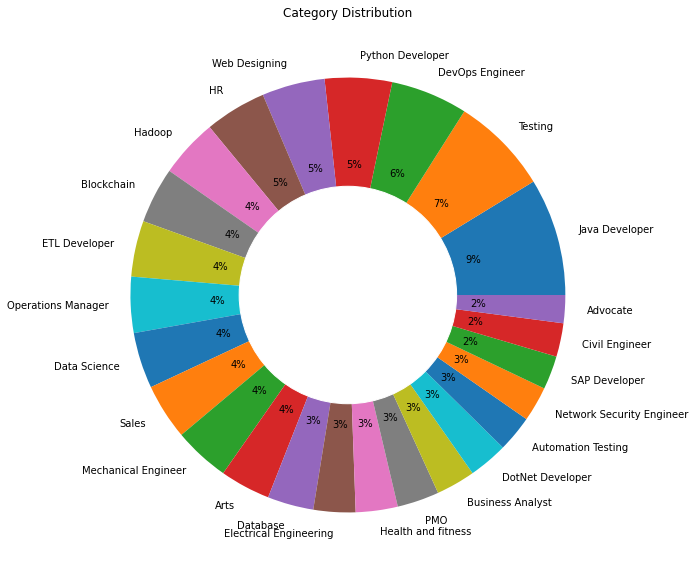

In [9]:
plt.figure(figsize=(20,10))
plt.pie(category['Category'], labels=category['index'], autopct='%.0f%%')
my_circle = plt.Circle((0, 0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Category Distribution')
plt.show()

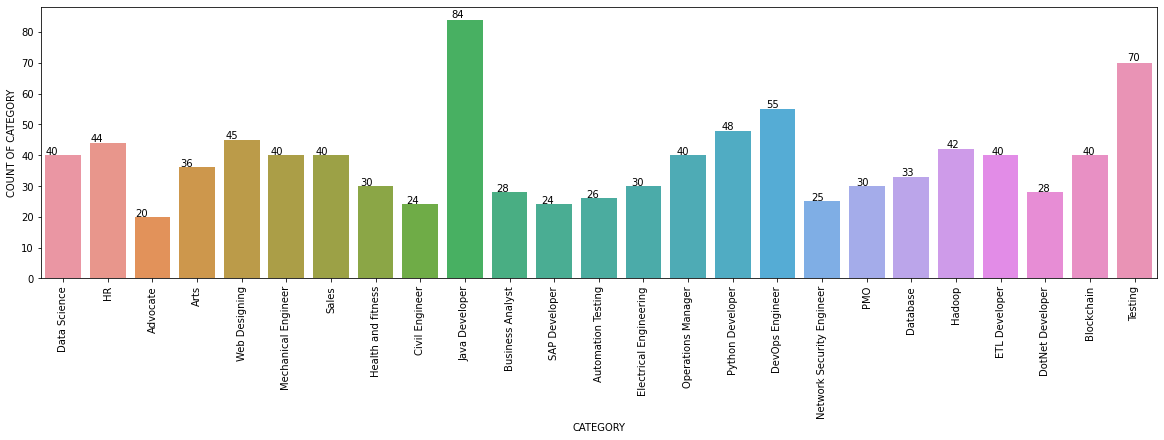

In [10]:
plt.figure(figsize=(20,5))
plot=sns.countplot('Category',data=data)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xlabel('CATEGORY')
plt.ylabel('COUNT OF CATEGORY')
plt.show()

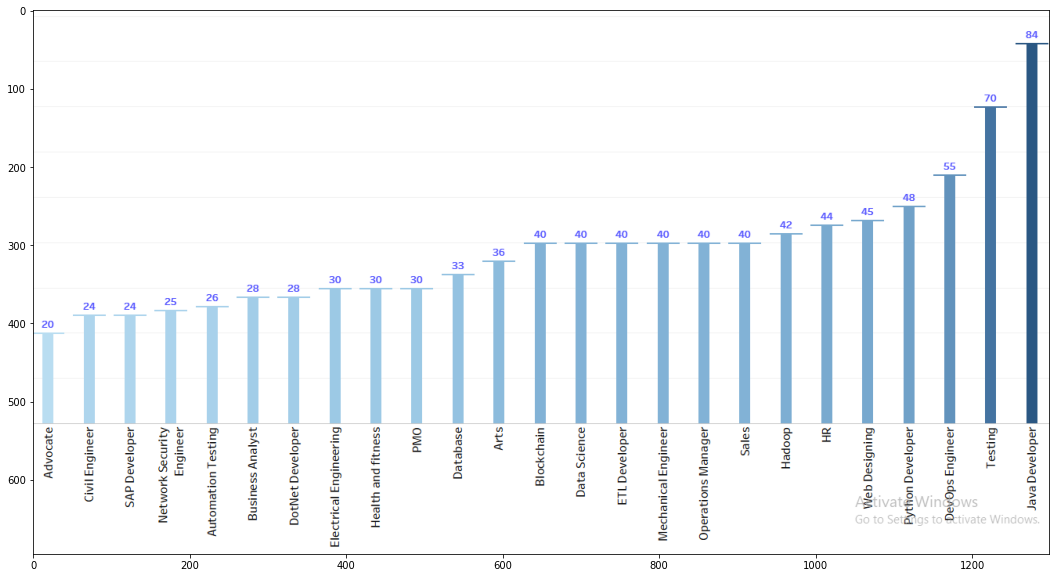

In [11]:
import matplotlib.image as img
plt.figure(figsize=(30,10))
image=img.imread('/content/Screenshot (30).png')
plt.imshow(image)
plt.show()


In [12]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [13]:
data['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
5      SKILLS C Basics, IOT, Python, MATLAB, Data Sci...
6      Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7      Education Details \r\n B.Tech   Rayat and Bahr...
8      Personal Skills â¢ Ability to quickly grasp t...
9      Expertise â Data and Quantitative Analysis â...
10     Skills * Programming Languages: Python (pandas...
11     Education Details \r\nMay 2013 to May 2017 B.E...
12     Areas of Interest Deep Learning, Control Syste...
13     Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
14     Education Details \r\n MCA   YMCAUST,  Faridab...
15     SKILLS C Basics, IOT, Python, MATLAB, Data Sci...
16     Skills â¢ Python â¢ Tableau â¢ Data Visuali...
17     Education Details \r\n B

In [14]:
import re

In [15]:
clean_text=[]
for i in range(len(data['Resume'])):
  x=re.sub('[^a-zA-Z]',' ',data['Resume'][i])
  x=x.lower()
  clean_text.append(x)


In [16]:
clean_text

Output hidden; open in https://colab.research.google.com to view.

In [17]:
data['clean_Resume']=pd.Series(clean_text)

In [18]:
data

,Category,Resume,clean_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skills c basics iot python matlab data sci...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skills python tableau data visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education details b tech rayat and bahra ...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skills ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...,expertise data and quantitative analysis ...


In [19]:
data1=data.drop('Resume',axis=1)

In [20]:
data1

,Category,clean_Resume
0,Data Science,skills programming languages python pandas...
1,Data Science,education details may to may b e ...
2,Data Science,areas of interest deep learning control syste...
3,Data Science,skills r python sap hana table...
4,Data Science,education details mca ymcaust faridabad...
5,Data Science,skills c basics iot python matlab data sci...
6,Data Science,skills python tableau data visuali...
7,Data Science,education details b tech rayat and bahra ...
8,Data Science,personal skills ability to quickly grasp t...
9,Data Science,expertise data and quantitative analysis ...


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
data['Category']=le.fit_transform(data['Category'])

In [24]:
data['Category'].value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [25]:
X=data['clean_Resume']
y=data['Category']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721,)
(241,)
(721,)
(241,)


In [29]:
feature_extraction=TfidfVectorizer()

In [30]:
X_train=feature_extraction.fit_transform(X_train)

In [31]:
print(X_train)

  (0, 4491)	0.13949932941405396
  (0, 7102)	0.05650073720547414
  (0, 4095)	0.12542774493032588
  (0, 2644)	0.21654684503574387
  (0, 3484)	0.170286960817426
  (0, 4162)	0.1045909425626962
  (0, 6819)	0.19583790067789744
  (0, 421)	0.057188385027924046
  (0, 4456)	0.4056858625333701
  (0, 3099)	0.043536544404152
  (0, 7115)	0.07255066520287322
  (0, 7001)	0.21654684503574387
  (0, 1742)	0.03842129648280772
  (0, 3736)	0.07178221365748244
  (0, 5076)	0.076641898573937
  (0, 5952)	0.07203666025951085
  (0, 1569)	0.21654684503574387
  (0, 1223)	0.07684259296561544
  (0, 5890)	0.03842129648280772
  (0, 1777)	0.15651665831475067
  (0, 5082)	0.2074153109339763
  (0, 981)	0.1593729952998108
  (0, 5369)	0.12199936908586752
  (0, 2121)	0.07140367565480898
  (0, 4350)	0.04257596195966138
  :	:
  (720, 859)	0.0747167761067568
  (720, 4984)	0.08185026056488033
  (720, 4385)	0.01917260323591761
  (720, 4986)	0.029656163777155915
  (720, 4094)	0.01684310540773883
  (720, 4093)	0.0751125841005681
  (

In [32]:
X_test=feature_extraction.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model1=KNeighborsClassifier()

In [35]:
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred1=model1.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         8
           8       1.00      0.85      0.92        13
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       0.91      1.00      0.95        10
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00         7
          17       1.00    

In [39]:
confusion_matrix(y_test,y_pred1)

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 11,  0,  0,  0,  0,  0, 

In [40]:
a1=input('Enter Skills:   ')
a1=feature_extraction.transform([a1])
pred=model1.predict(a1)
if pred==0:
  print('Advocate')
elif pred==1:
  print('Arts')
elif pred==2:
  print('Automation Testing')
elif pred==3:
  print('Blockchain')
elif pred==4:
  print('Business Analyst')
elif pred==5:
  print('Civil Engineer')
elif pred==6:
  print('Data Science')
elif pred==7:
  print('Database')
elif pred==8:
  print('DevOps Engineer')
elif pred==9:
  print('DotNet Developer')
elif pred==10:
  print('ETL Developer')
elif pred==11:
  print('Electrical Engineering')
elif pred==12:
  print('HR')
elif pred==13:
  print('Hadoop')
elif pred==14:
  print('Health and fitness')
elif pred==15:
  print('Java Developer')
elif pred==16:
  print('Mechanical Engineer')
elif pred==17:
  print('Network Security Engineer')
elif pred==18:
  print('Operations Manager')
elif pred==19:
  print('PMO')
elif pred==20:
  print('Python Developer')
elif pred==21:
  print('SAP Developer')
elif pred==22:
  print('Sales')
elif pred==23:
  print('Testing')
else:
  print('Web Designing')

Enter Skills:   COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power
Testing
